In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

![Description](https://images.ctfassets.net/y2ske730sjqp/1aONibCke6niZhgPxuiilC/2c401b05a07288746ddf3bd3943fbc76/BrandAssets_Logos_01-Wordmark.jpg?w=940)

In [3]:
df = pd.read_csv('netflix.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic EDA to understand the data

In [ ]:
# Dataset has 8807 data points and 12 features

df.shape

(8807, 12)

In [ ]:
# Dimension of the dataset

df.ndim

2

In [6]:
# Check the basic info datatype, name, total entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Check the unique directors

df['director'].nunique()

4528

In [8]:
# Check how many Movies and TV shows

df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
# check duplicate row present?

df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# Check how many countries data available

df['country'].nunique()

# 748 countries data available

748

In [11]:
# List of countries produced movies/tv shows

df['country'].value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [12]:
# Check for how many years of data available

df['release_year'].min(), df['release_year'].max()

(1925, 2021)

In [13]:
# Check how many genre available

df['listed_in'].nunique()

514

### Un-nesting the data

In [14]:
df_new = df.copy(deep=True)
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df_new.rename(columns={'cast' : 'actor', 'listed_in':'genre'}, inplace=True)
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Un-nesting actor column

df_new['actor'] = df_new['actor'].str.split(', ')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df_new = df_new.explode('actor')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [18]:
df_new.shape

(64951, 12)

In [ ]:
# Un-nesting director column

df_new['director'] = df_new['director'].str.split(', ')
df_new = df_new.explode('director')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [20]:
df_new.shape

(70812, 12)

In [ ]:
# Un-nesting country column

df_new['country'] = df_new['country'].str.split(', ')
df_new = df_new.explode('country')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [22]:
df_new.shape

(89382, 12)

In [ ]:
# Un-nesting genre column

df_new['genre'] = df_new['genre'].str.split(', ')
df_new = df_new.explode('genre')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [24]:
df_new.shape

(201991, 12)

In [25]:
df_new['director'].str.contains(', ').sum()

0

In [26]:
df_new['actor'].str.contains(', ').sum()

0

In [27]:
df_new['genre'].str.contains(', ').sum()

np.int64(0)

In [28]:
df_new['country'].str.contains(', ').sum()

0

In [29]:
df_new.isna().sum()

show_id             0
type                0
title               0
director        50643
actor            2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
genre               0
description         0
dtype: int64

In [30]:
df_new.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [31]:
df_new.isna().sum()

show_id             0
type                0
title               0
director        50425
actor            2146
country         11894
date_added          0
release_year        0
rating              0
duration            0
genre               0
description         0
dtype: int64

### Imputing missing values

In [32]:
df_new.head(10)

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [33]:
df_new['type'].value_counts()

type
Movie      145831
TV Show     55932
Name: count, dtype: int64

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201763 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201763 non-null  object
 1   type          201763 non-null  object
 2   title         201763 non-null  object
 3   director      151338 non-null  object
 4   actor         199617 non-null  object
 5   country       189869 non-null  object
 6   date_added    201763 non-null  object
 7   release_year  201763 non-null  int64 
 8   rating        201763 non-null  object
 9   duration      201763 non-null  object
 10  genre         201763 non-null  object
 11  description   201763 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [35]:
df_new['date_added_copy'] = pd.to_datetime(df_new['date_added'].str.strip(), format='%B %d, %Y')

In [36]:
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


### Replacing NAN with unknown

In [37]:
df_new['director'] = df_new['director'].fillna('Unknown_director')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [38]:
df_new['actor'] = df_new['actor'].fillna('Unknown_actor')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [39]:
df_new['country'] = df_new['country'].fillna('Unknown_country')
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [40]:
df_new.isna().sum()

show_id            0
type               0
title              0
director           0
actor              0
country            0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
date_added_copy    0
dtype: int64

## Exploratory Data Analysis(EDA) and Explanatory Data Analysis(ExDA)

### 1. Categorical variable graphical and non-graphical analysis ?

In [41]:
# This shows count of movies are more than tv shows - Non graphical
df_new['type'].value_counts()

type
Movie      145831
TV Show     55932
Name: count, dtype: int64

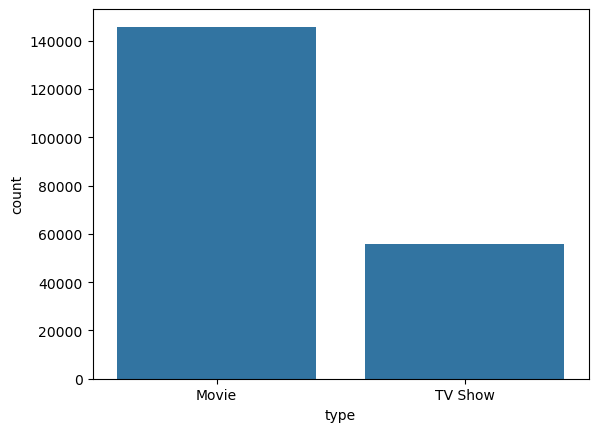

In [42]:
# Compare number of Movies v/s TV shows

x_bar = df_new['type'].index
y_bar = df_new['type']
sns.countplot(data = df_new, x='type')
plt.show()

# Movies are more directed than TV shows

In [43]:
# Count the number movies and tv shows done by each country

df_new['country'].value_counts()

country
United States      59262
India              22814
United Kingdom     12918
Unknown_country    11894
Japan               8599
                   ...  
Botswana               2
United States,         1
Nicaragua              1
Kazakhstan             1
Uganda                 1
Name: count, Length: 128, dtype: int64

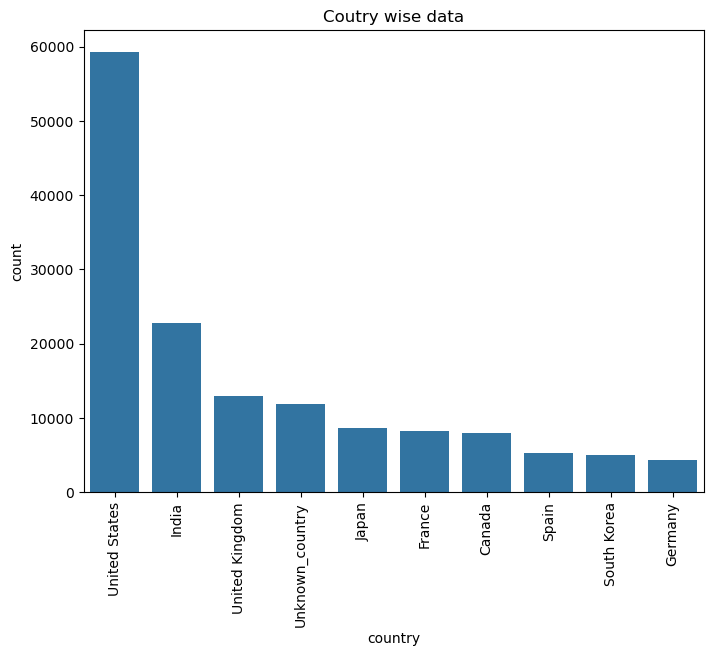

In [44]:
# Lets compare country which are directed movies/tvshows

plt.figure(figsize=(8, 6))
sns.barplot(data = df_new['country'].value_counts().head(10))
plt.title('Coutry wise data')
plt.xticks(rotation = 90)
plt.show()

# United states are the top country in producing movies/tv shows

In [45]:
# Count the number of each ratings

df_new['rating'].value_counts()

rating
TV-MA       73835
TV-14       43859
R           25860
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

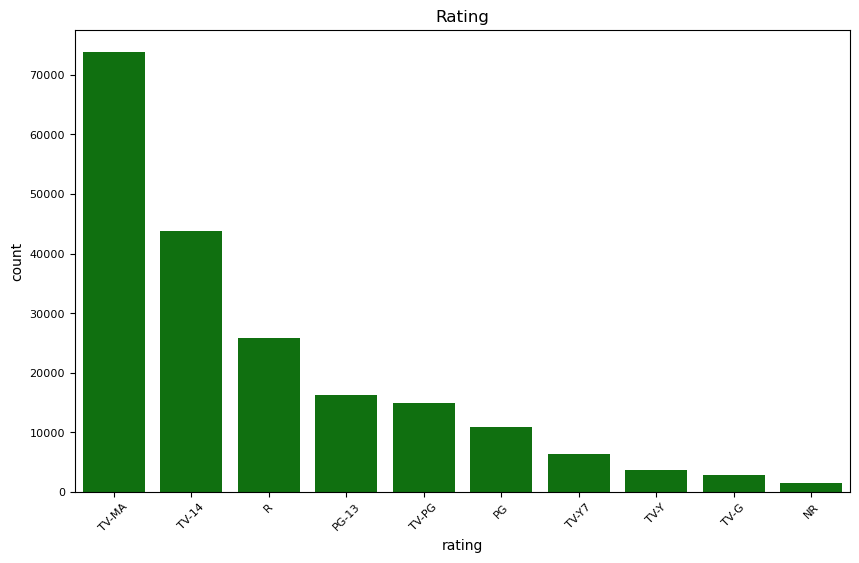

In [46]:
# Compare the ratings of different rating type

plt.figure(figsize=(10, 6))

sns.barplot(data = df_new['rating'].value_counts().head(10), color='green')
plt.title('Rating')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation = 45)
plt.show()

# Mature Audiance content is highly rated follows by 14+ etc

In [47]:
# Count which content type is more popular

df_new['genre'].value_counts()

genre
Dramas                          29768
International Movies            28211
Comedies                        20829
International TV Shows          12815
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult M

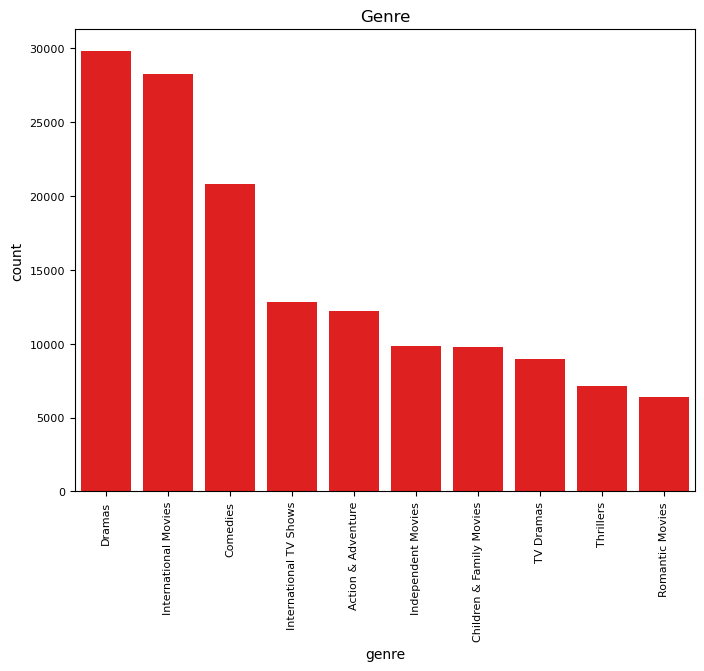

In [48]:
# Dramas and International movies are more popular

plt.figure(figsize=(8, 6))

sns.barplot(data = df_new['genre'].value_counts().head(10), color='Red')
plt.title('Genre')
plt.xticks(rotation = 90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### 2. TV Shows v/s Movies comparision ?

In [49]:
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [50]:
# Top 10 heighest Movies produced contries 

df_new_movie = df_new.loc[df_new['type'] == 'Movie']
df_new_movie.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,Unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24


In [51]:
filtered_df_new_movie = df_new_movie[df_new_movie['country'] != 'Unknown_country'].copy()
count_df_new_movie = filtered_df_new_movie.groupby('country')['title'].nunique()
count_df_new_movie

country
                1
Afghanistan     1
Albania         1
Algeria         3
Angola          1
               ..
Vatican City    1
Venezuela       4
Vietnam         7
West Germany    3
Zimbabwe        3
Name: title, Length: 122, dtype: int64

In [52]:
count_df_new_movie.sort_values(ascending=False).head(10)

country
United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: title, dtype: int64

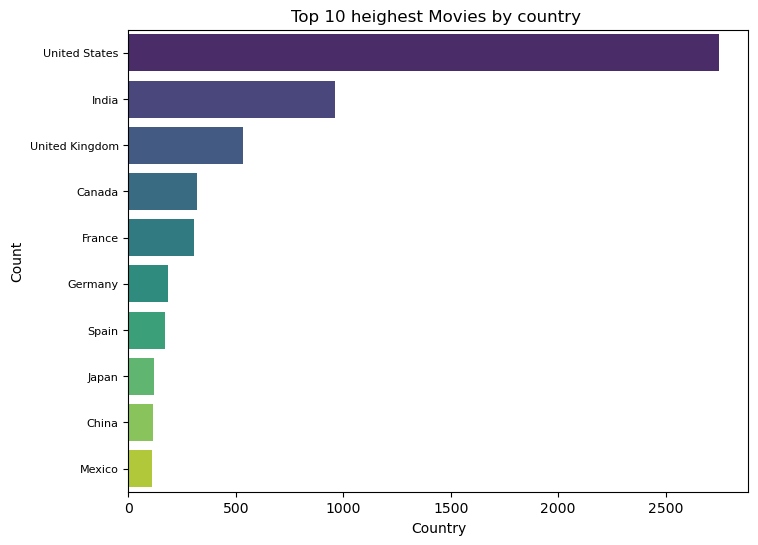

In [53]:
plt.figure(figsize=(8, 6))

data_count_df_new_movie = count_df_new_movie.sort_values(ascending=False).head(10)
sns.barplot(x = data_count_df_new_movie.values, y=data_count_df_new_movie.index, hue=data_count_df_new_movie.index, palette='viridis', legend=False)
plt.title('Top 10 heighest Movies by country ')
plt.xlabel('Country')
plt.ylabel('Count')
plt.yticks(fontsize=8)
plt.show()

* Movies: USA, India, UK, Canada, and France lead the way.

In [54]:
# Top 10 heighest TV Shows produced contries 

df_new_tvshow = df_new.loc[df_new['type'] == 'TV Show']
df_new_tvshow.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [55]:
filtered_df_new_tvshow = df_new_tvshow[df_new_tvshow['country'] != 'Unknown_country'].copy()

count_df_new_tvshow = filtered_df_new_tvshow.groupby('country')['title'].nunique()
count_df_new_tvshow

country
                          1
Argentina                20
Australia                64
Austria                   1
Azerbaijan                1
                       ... 
United Arab Emirates      1
United Kingdom          271
United States           932
Uruguay                   1
West Germany              2
Name: title, Length: 66, dtype: int64

In [56]:
count_df_new_tvshow.sort_values(ascending=False).head(10)

country
United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
Name: title, dtype: int64

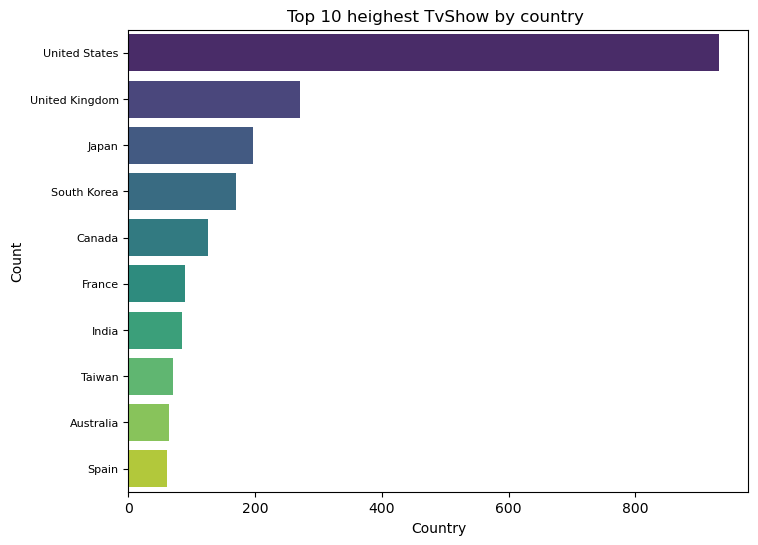

In [57]:
plt.figure(figsize=(8, 6))

data_count_df_new_tvshow = count_df_new_tvshow.sort_values(ascending=False).head(10)

sns.barplot(x = data_count_df_new_tvshow.values, y=data_count_df_new_tvshow.index, hue=data_count_df_new_tvshow.index, palette='viridis', legend=False)
plt.title('Top 10 heighest TvShow by country ')
plt.xlabel('Country')
plt.ylabel('Count')
plt.yticks(fontsize=8)
plt.show()

* TV Shows: USA and UK dominate, followed by Japan and South Korea

### 3. Best time to launch Movies and TV show ?

In [58]:
df_new['type'].value_counts()

type
Movie      145831
TV Show     55932
Name: count, dtype: int64

In [59]:
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [60]:
df_new['week_number'] = df_new['date_added_copy'].dt.isocalendar().week

In [61]:
movies = df_new[df_new['type'] == 'Movie']
tv_shows = df_new[df_new['type'] == 'TV Show']

In [62]:
df_new.head(5)

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy,week_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,38
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,38
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38


In [63]:
movies_week_counts = movies.groupby('week_number')['show_id'].count().sort_values(ascending=False)
tv_week_counts = tv_shows.groupby('week_number')['show_id'].count().sort_values(ascending=False)

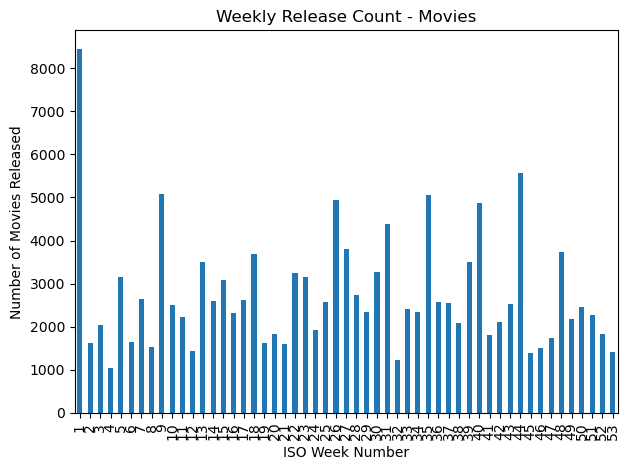

In [64]:
plt.figure()
movies_week_counts.sort_index().plot(kind='bar')
plt.title('Weekly Release Count - Movies')
plt.xlabel('ISO Week Number')
plt.ylabel('Number of Movies Released')
plt.tight_layout()
plt.show()

* Week 1 is the most movies release and between week 1 and week 9 would be the prime time to release movie to Netflix

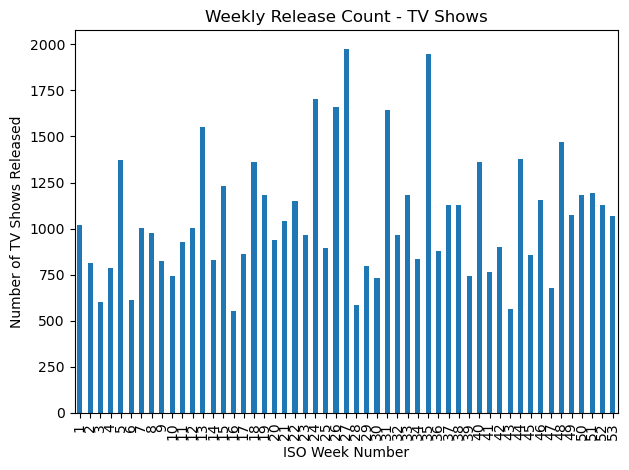

In [65]:
plt.figure()
tv_week_counts.sort_index().plot(kind='bar')
plt.title('Weekly Release Count - TV Shows')
plt.xlabel('ISO Week Number')
plt.ylabel('Number of TV Shows Released')
plt.tight_layout()
plt.show()

* Week 27 and week 35 is the prime time to release TV shows to the Netflix platform

In [66]:
# Monthly ananlysis

df_new['month_number'] = df_new['date_added_copy'].dt.month

In [67]:
movies = df_new[df_new['type'] == 'Movie']
tv_shows = df_new[df_new['type'] == 'TV Show']

In [68]:
movies_month_counts = movies.groupby('month_number')['show_id'].count().sort_values(ascending=False)
tv_month_counts = tv_shows.groupby('month_number')['show_id'].count().sort_values(ascending=False)

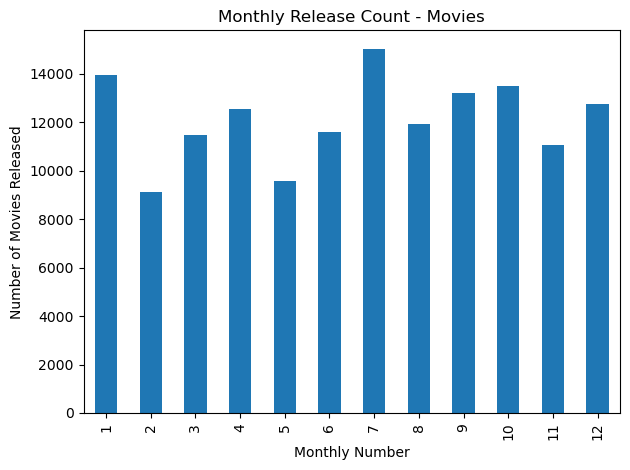

In [69]:
plt.figure()
movies_month_counts.sort_index().plot(kind='bar')
plt.title('Monthly Release Count - Movies')
plt.xlabel('Monthly Number')
plt.ylabel('Number of Movies Released')
plt.tight_layout()
plt.show()

* In the month of January and July has more Movies launched hence this provides information about the best time to launch the content to Netflix platform

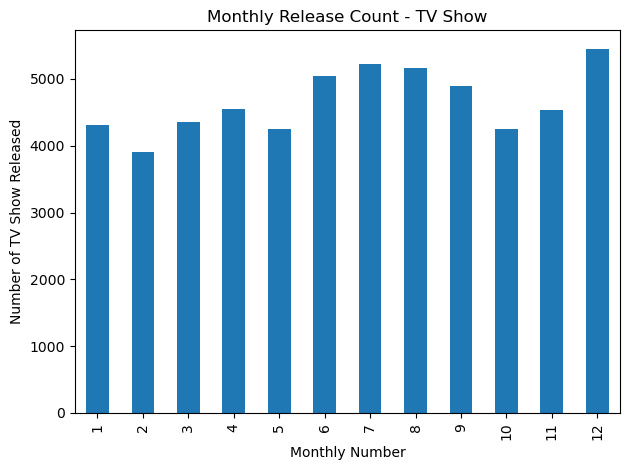

In [70]:
plt.figure()
tv_month_counts.sort_index().plot(kind='bar')
plt.title('Monthly Release Count - TV Show')
plt.xlabel('Monthly Number')
plt.ylabel('Number of TV Show Released')
plt.tight_layout()
plt.show()

* In the month of  July and December has more TV Show released hence this provides information about the best time to launch the content to Netflix platform

### 4. Analysis of actors/directors of different types of shows/movies.

In [71]:
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy,week_number,month_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9


In [72]:
df_new_filtered = df_new[df_new['director'] != 'Unknown_director'].copy()
movies = df_new_filtered[df_new_filtered['type'] == 'Movie']
tv_shows = df_new_filtered[df_new_filtered['type'] == 'TV Show']

In [73]:
movies.groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

director
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: show_id, dtype: int64

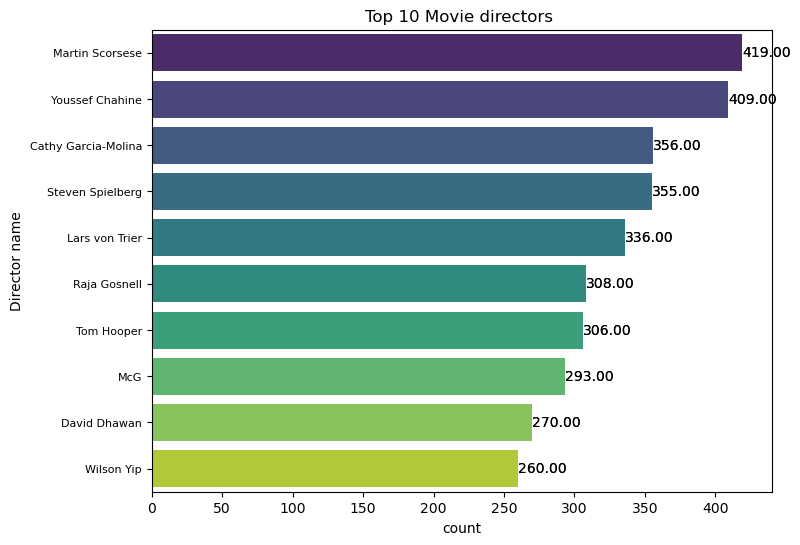

In [74]:
plt.figure(figsize=(8, 6))

top_movies_director = movies.groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director.values, y=top_movies_director.index, hue=top_movies_director.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors ')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director.values, y=top_movies_director.index, hue=top_movies_director.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina are the most popular international directors

#### Top 10 Movie Directors in India 

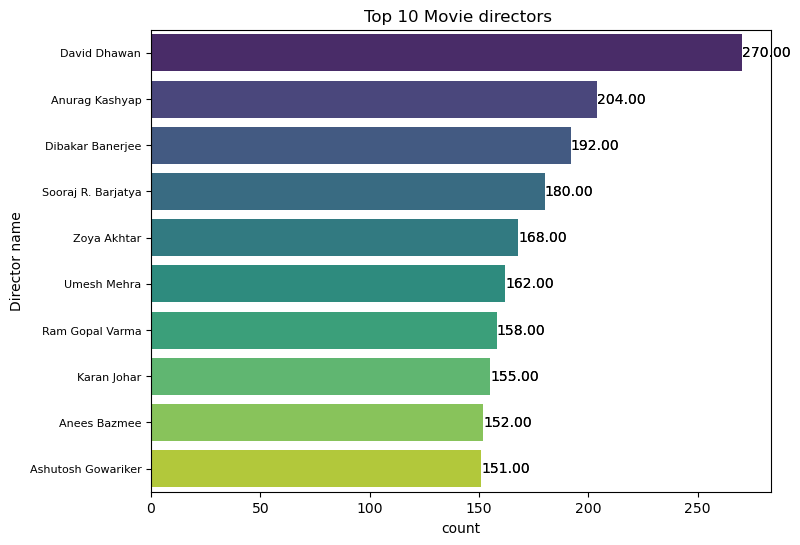

In [75]:


plt.figure(figsize=(8, 6))

top_movies_director = movies[movies['country'] == 'India'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director.values, y=top_movies_director.index, hue=top_movies_director.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors ')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director.values, y=top_movies_director.index, hue=top_movies_director.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* David Dhawan, Anurag Kashyap, Dibakar Banerjee are the most popular directors in India

In [76]:
movies['genre'].value_counts()

genre
Dramas                      29634
International Movies        28056
Comedies                    20587
Action & Adventure          12179
Independent Movies           9820
Children & Family Movies     9535
Thrillers                    7103
Romantic Movies              6365
Horror Movies                4563
Sci-Fi & Fantasy             4001
Music & Musicals             3018
Documentaries                2288
Sports Movies                1521
Classic Movies               1434
Cult Movies                  1077
Anime Features               1044
LGBTQ Movies                  823
Faith & Spirituality          719
Stand-Up Comedy               476
Movies                        305
Name: count, dtype: int64

In [77]:
tv_shows['genre'].value_counts()

genre
International TV Shows          1781
TV Dramas                       1215
Crime TV Shows                   667
TV Comedies                      401
TV Action & Adventure            353
TV Shows                         332
Romantic TV Shows                306
Kids' TV                         242
British TV Shows                 231
TV Mysteries                     213
Spanish-Language TV Shows        194
Docuseries                       189
TV Horror                        146
Anime Series                     131
Korean TV Shows                  111
TV Thrillers                      78
TV Sci-Fi & Fantasy               62
Teen TV Shows                     48
Classic & Cult TV                 38
Stand-Up Comedy & Talk Shows      31
Reality TV                        11
Science & Nature TV               10
Name: count, dtype: int64

#### Analyse different movie type each(Dramas, Internationl Movies, Comedies, Action & Adventure)

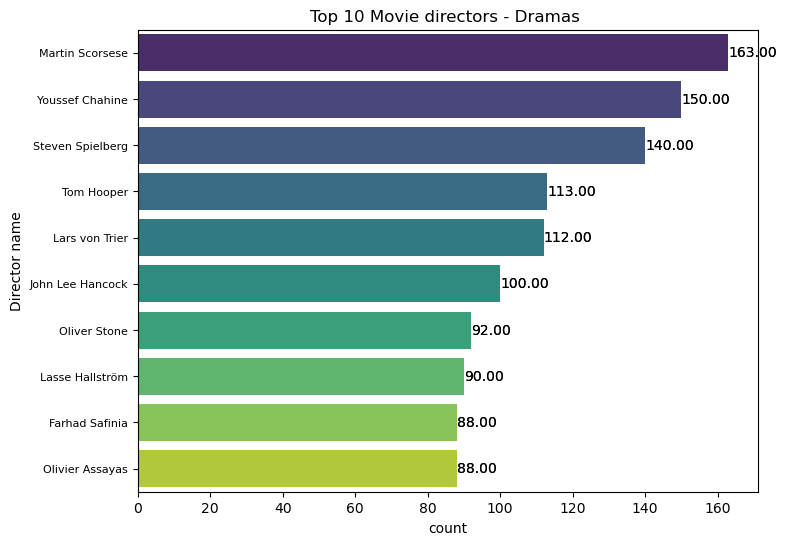

In [78]:
# Dramas analysis

plt.figure(figsize=(8, 6))

top_movies_director_dramas = movies[movies['genre'] == 'Dramas'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director_dramas.values, y=top_movies_director_dramas.index, hue=top_movies_director_dramas.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors - Dramas ')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director_dramas.values, y=top_movies_director_dramas.index, hue=top_movies_director_dramas.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

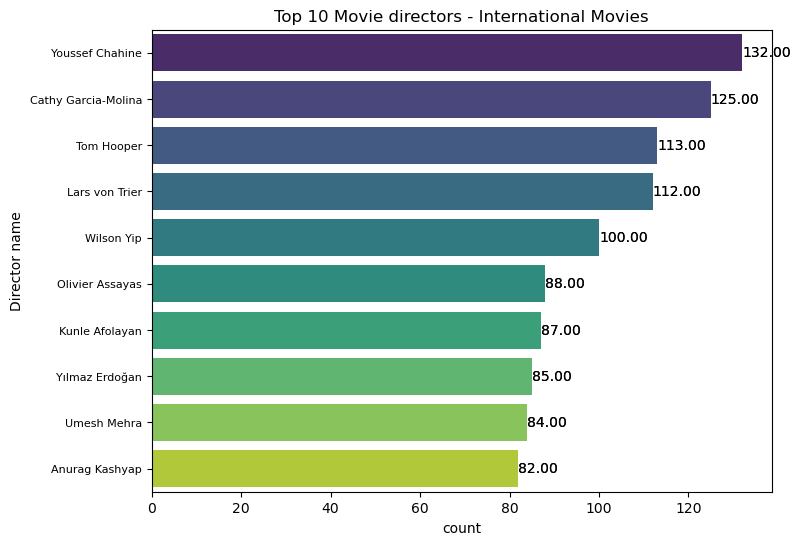

In [79]:
# International Movies analysis

plt.figure(figsize=(8, 6))

top_movies_director_International_Movies = movies[movies['genre'] == 'International Movies'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director_International_Movies.values, y=top_movies_director_International_Movies.index, hue=top_movies_director_International_Movies.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors - International Movies')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director_International_Movies.values, y=top_movies_director_International_Movies.index, hue=top_movies_director_International_Movies.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

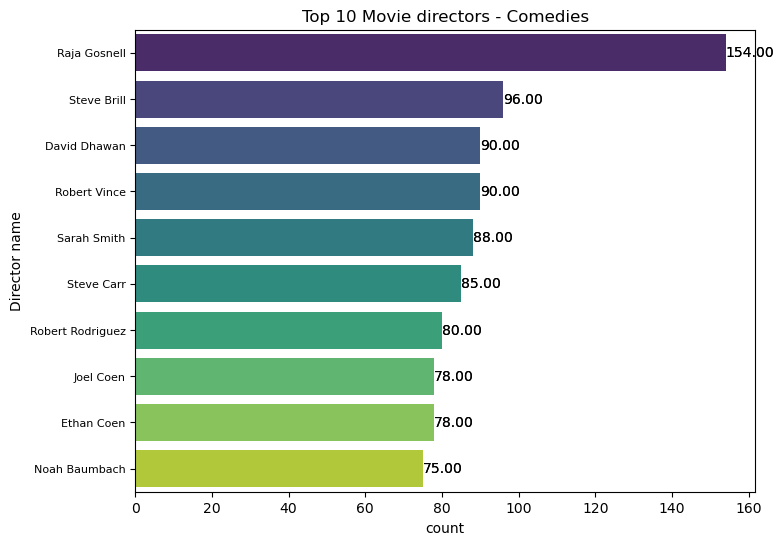

In [80]:
# Comedies analysis

plt.figure(figsize=(8, 6))

top_movies_director_Comedies = movies[movies['genre'] == 'Comedies'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director_Comedies.values, y=top_movies_director_Comedies.index, hue=top_movies_director_Comedies.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors - Comedies')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director_Comedies.values, y=top_movies_director_Comedies.index, hue=top_movies_director_Comedies.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

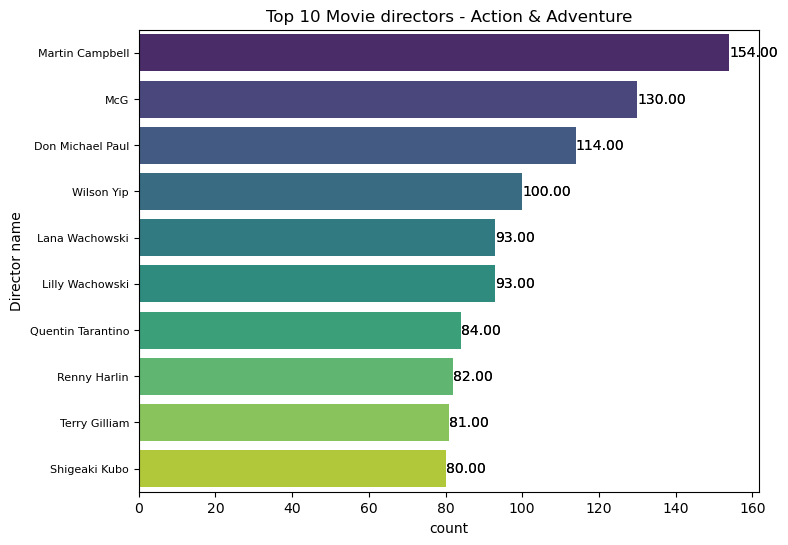

In [81]:
# Action & Adventure  analysis

plt.figure(figsize=(8, 6))

top_movies_director_Action_Adventure = movies[movies['genre'] == 'Action & Adventure'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_movies_director_Action_Adventure.values, y=top_movies_director_Action_Adventure.index, hue=top_movies_director_Action_Adventure.index, palette='viridis', legend=False)
plt.title('Top 10 Movie directors - Action & Adventure')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_movies_director_Action_Adventure.values, y=top_movies_director_Action_Adventure.index, hue=top_movies_director_Action_Adventure.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

#### Analyse different TV Shows of type (International TV Shows, TV Dramas, Crime TV Shows , TV Comedies, TV Action & Adventure)

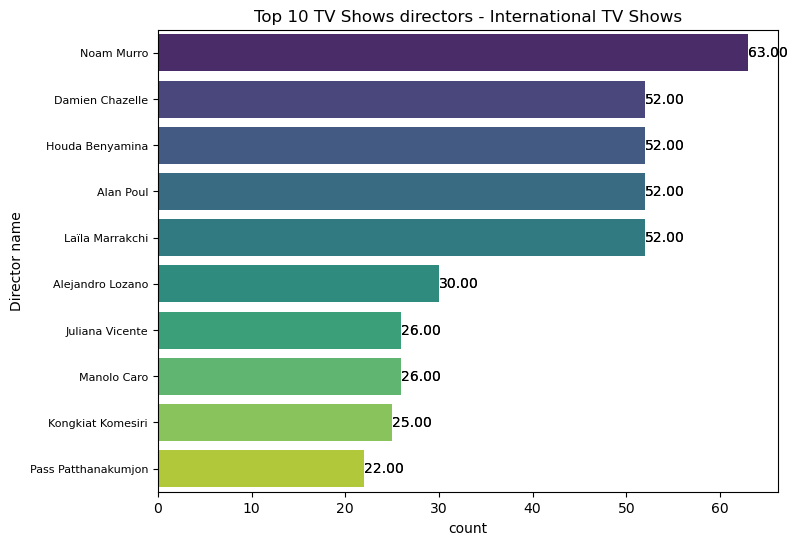

In [82]:
# International TV Shows   analysis

plt.figure(figsize=(8, 6))

top_tvshow_International_TV_Shows = tv_shows[tv_shows['genre'] == 'International TV Shows'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_tvshow_International_TV_Shows.values, y=top_tvshow_International_TV_Shows.index, hue=top_tvshow_International_TV_Shows.index, palette='viridis', legend=False)
plt.title('Top 10 TV Shows directors - International TV Shows')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_tvshow_International_TV_Shows.values, y=top_tvshow_International_TV_Shows.index, hue=top_tvshow_International_TV_Shows.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

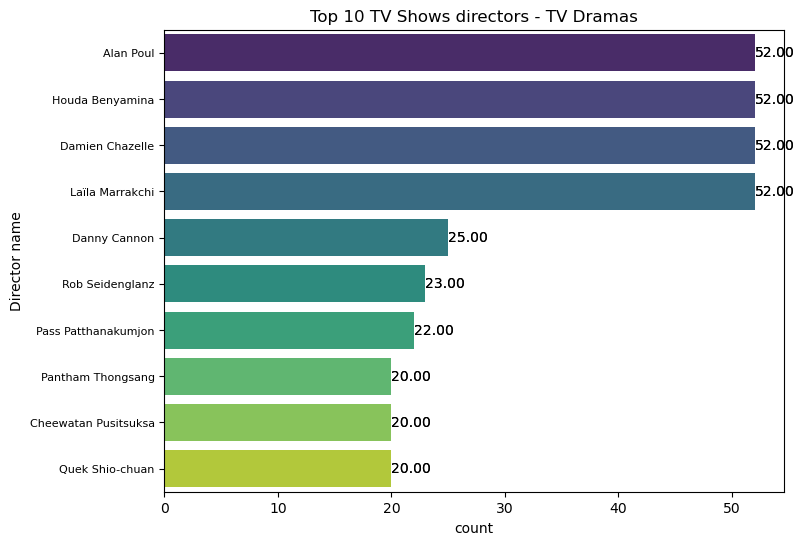

In [83]:
# TV Dramas analysis

plt.figure(figsize=(8, 6))

top_tvshow_TV_Dramas = tv_shows[tv_shows['genre'] == 'TV Dramas'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_tvshow_TV_Dramas.values, y=top_tvshow_TV_Dramas.index, hue=top_tvshow_TV_Dramas.index, palette='viridis', legend=False)
plt.title('Top 10 TV Shows directors - TV Dramas')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_tvshow_TV_Dramas.values, y=top_tvshow_TV_Dramas.index, hue=top_tvshow_TV_Dramas.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

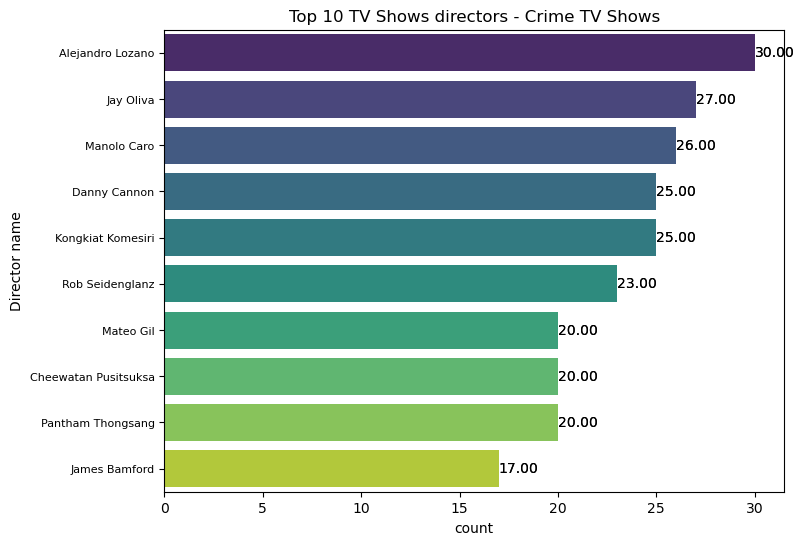

In [84]:
# Crime TV Shows analysis

plt.figure(figsize=(8, 6))

top_tvshow_Crime_TV_Shows = tv_shows[tv_shows['genre'] == 'Crime TV Shows'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_tvshow_Crime_TV_Shows.values, y=top_tvshow_Crime_TV_Shows.index, hue=top_tvshow_Crime_TV_Shows.index, palette='viridis', legend=False)
plt.title('Top 10 TV Shows directors - Crime TV Shows')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_tvshow_Crime_TV_Shows.values, y=top_tvshow_Crime_TV_Shows.index, hue=top_tvshow_Crime_TV_Shows.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

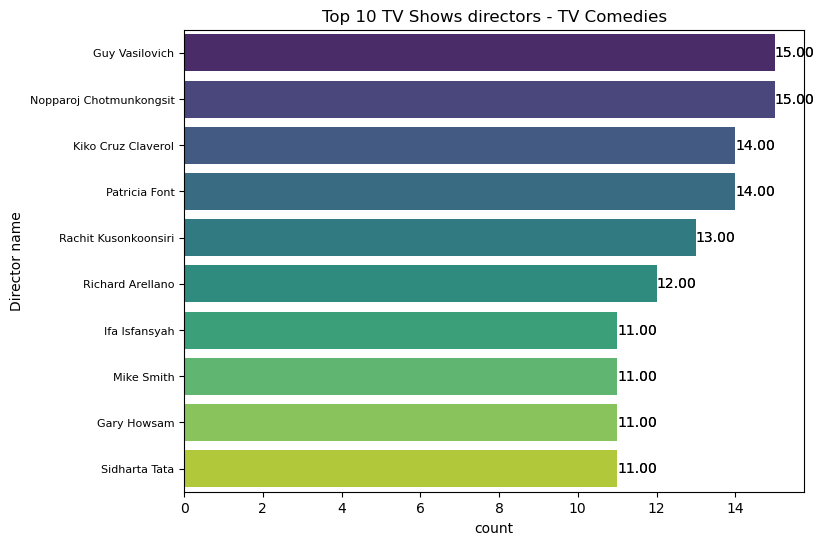

In [85]:
# TV Comedies analysis

plt.figure(figsize=(8, 6))

top_tvshow_TV_Comedies = tv_shows[tv_shows['genre'] == 'TV Comedies'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_tvshow_TV_Comedies.values, y=top_tvshow_TV_Comedies.index, hue=top_tvshow_TV_Comedies.index, palette='viridis', legend=False)
plt.title('Top 10 TV Shows directors - TV Comedies')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_tvshow_TV_Comedies.values, y=top_tvshow_TV_Comedies.index, hue=top_tvshow_TV_Comedies.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

#### Top 10 TV Shows directors - India

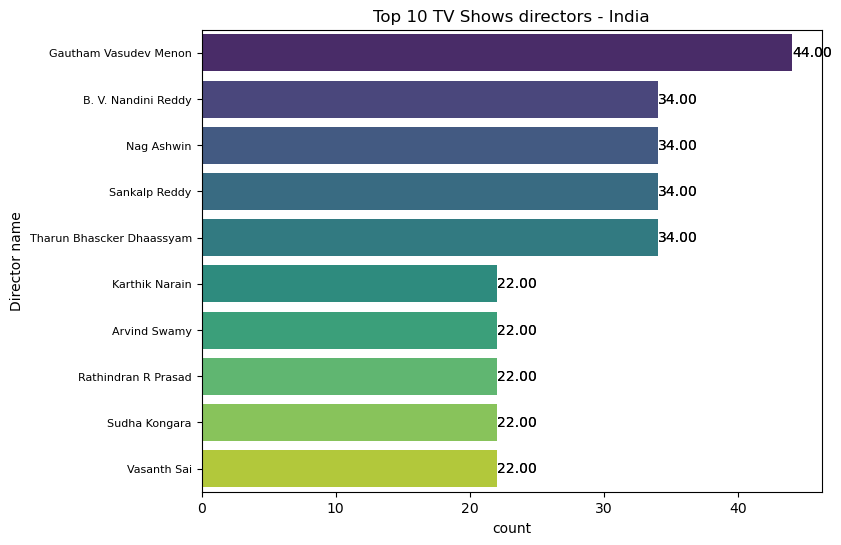

In [86]:
plt.figure(figsize=(8, 6))

top_tvshow_India = tv_shows[tv_shows['country'] == 'India'].groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_tvshow_India.values, y=top_tvshow_India.index, hue=top_tvshow_India.index, palette='viridis', legend=False)
plt.title('Top 10 TV Shows directors - India')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_tvshow_India.values, y=top_tvshow_India.index, hue=top_tvshow_India.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

### 5. Top Genre movies to produce for or popular more

#### Top 10 popular genre

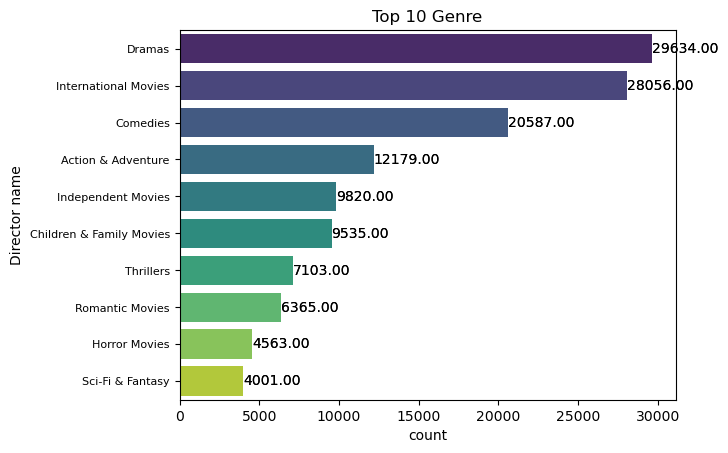

In [87]:
top_popular_genre = movies['genre'].value_counts().head(10)

sns.barplot(x = top_popular_genre.values, y=top_popular_genre.index, hue=top_popular_genre.index, palette='viridis', legend=False)
plt.title('Top 10 Genre')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_popular_genre.values, y=top_popular_genre.index, hue=top_popular_genre.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* Dramas genre type are the most popular movie type and recomended movie type to produce

#### Top 10 popular genre - India

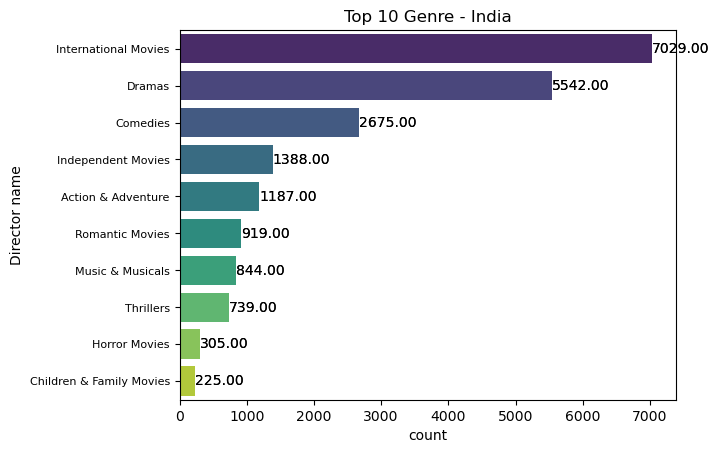

In [88]:
movies_india = movies[movies['country'] == 'India']
top_popular_genre_india = movies_india['genre'].value_counts().head(10)


sns.barplot(x = top_popular_genre_india.values, y=top_popular_genre_india.index, hue=top_popular_genre_india.index, palette='viridis', legend=False)
plt.title('Top 10 Genre - India')
plt.xlabel('count')
plt.ylabel('Director name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_popular_genre_india.values, y=top_popular_genre_india.index, hue=top_popular_genre_india.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* International Movies genre type are the most popular movie type in India and recomended movie type to produce

#### Most popular International actor

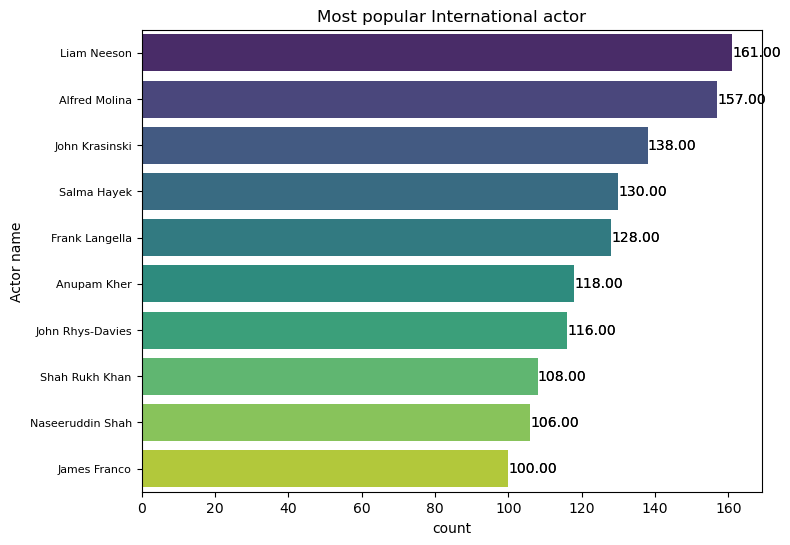

In [89]:
plt.figure(figsize=(8, 6))

df_new_filtered = df_new[df_new['actor'] != 'Unknown_actor'].copy()
movies_actor = df_new_filtered[df_new_filtered['type'] == 'Movie']
tv_shows_actor = df_new_filtered[df_new_filtered['type'] == 'TV Show']

top_Actor = movies_actor.groupby('actor')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_Actor.values, y=top_Actor.index, hue=top_Actor.index, palette='viridis', legend=False)
plt.title('Most popular International actor')
plt.xlabel('count')
plt.ylabel('Actor name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_Actor.values, y=top_Actor.index, hue=top_Actor.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* Liam Neeson, Alfreen Molina, John Krasinski are the most popular international actor

#### Most popular actor - India

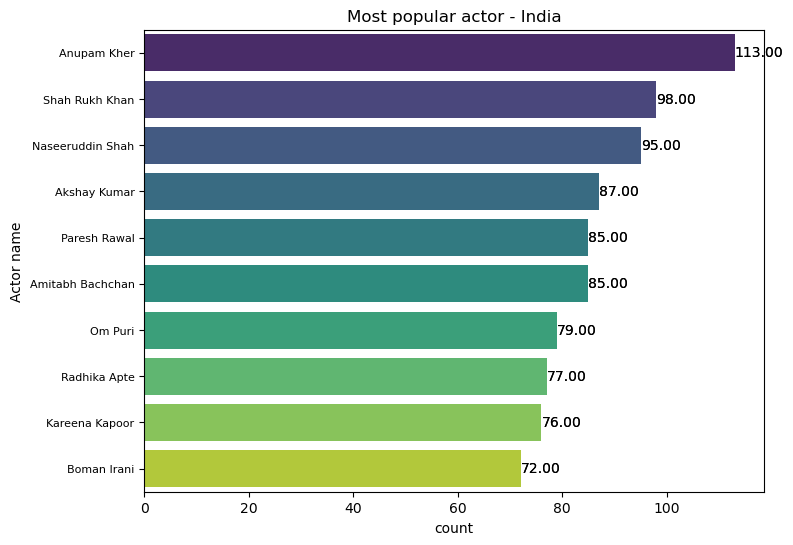

In [90]:
plt.figure(figsize=(8, 6))

top_India_Actor = movies[movies['country'] == 'India'].groupby('actor')['show_id'].count().sort_values(ascending=False).head(10)

sns.barplot(x = top_India_Actor.values, y=top_India_Actor.index, hue=top_India_Actor.index, palette='viridis', legend=False)
plt.title('Most popular actor - India')
plt.xlabel('count')
plt.ylabel('Actor name')
plt.yticks(fontsize=8)

ax = sns.barplot(x = top_India_Actor.values, y=top_India_Actor.index, hue=top_India_Actor.index, palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

plt.show()

* Anupam Kher, Shah Rukh Khan, Naseeruddhin Shan, Akshay Kumar are the most popular actors in India

### 6. After how many days movies will be added after the release of the movie

In [91]:
df_new['year_number'] = df_new['date_added_copy'].dt.year

In [92]:
df_new.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,date_added_copy,week_number,month_number,year_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9,2021
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021


In [93]:
difference_date = df_new['year_number'] - df_new['release_year']
difference_date

0       1
1       0
1       0
1       0
1       0
       ..
8806    4
8806    4
8806    4
8806    4
8806    4
Length: 201763, dtype: int64

In [94]:
difference_date.mode()

0    0
dtype: int64

* Most of the movies/TV shows were added within and year, hence would recomend to add withing an year of release date

📊 Netflix Case Study – Summary

By: Nishanth Gowda

This analysis explores patterns and insights from Netflix's catalog of movies and TV shows. The dataset includes ~8800 titles, with metadata like release year, cast, country, genre, and more. Key takeaways:

🔍 Key Insights:
1. Content Type:

    * Majority of the content on Netflix consists of Movies (~70%).

2. Top Producing Countries:

    * Movies: USA, India, UK, Canada, and France lead the way.

    * TV Shows: USA and UK dominate, followed by Japan and South Korea.

3. Best Time to Launch:

    * Movies are most often added on Fridays and during the summer (July–August).

    * TV Shows are frequently added on Thursdays and during October–December.

4. Top Directors & Actors:

    * Directors like Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina are the most popular international directors.

    * David Dhawan, Anurag Kashyap, Dibakar Banerjee are the most popular directors in India

    * Actors like Liam Neeson, Alfreen Molina, John Krasinski are the most popular international actor.

    * Actors like Anupam Kher, Shah Rukh Khan, Naseeruddhin Shan, Akshay Kumar are the most popular actors in India.

5. Popular Genres:

    * Common genres include International Movies, Dramas, and Comedies, as highlighted via a word cloud.

6. Release Delay:

    * On average, content appears on Netflix about 242 days after its original release that is within an year.